# Train the CNN/CapsNet, then generate adv examples

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import torch
from torch import optim

from datasets import get_mnist_dataset, get_data_loader
from utils import *

from cnn import *
from capsnet import *

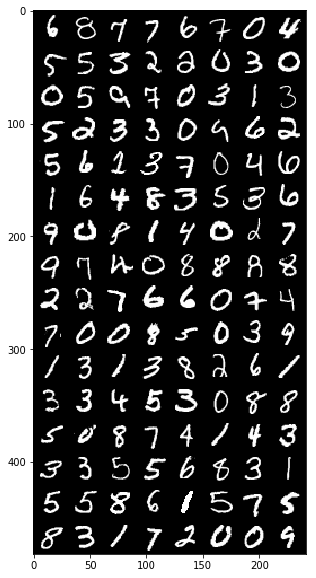

In [26]:
trainset, testset = get_mnist_dataset()
trainloader, testloader = get_data_loader(trainset, testset)
batch, labels = next(iter(trainloader))
plot_batch(batch)

In [112]:
batch_var = Variable(batch.cuda())
labels_var = Variable(one_hotify(labels).cuda())

# Custom CNN with few params

In [119]:
tiny_model = CNN().cuda()
print(count_params(tiny_model))

tiny_optimizer = optim.Adam(model.parameters())
tiny_loss = nn.CrossEntropyLoss()
tiny_trainer = Trainer(tiny_model, tiny_optimizer, tiny_loss,
                       trainloader, testloader, use_cuda=True)

246506


NameError: name 'model' is not defined

In [ ]:
tiny_trainer.run(epochs=5)

# Baseline CNN described in [1]

In [117]:
base_model = BaselineCNN().cuda()
print(count_params(base_model))

base_loss = nn.CrossEntropyLoss()
base_optimizer = optimizer = optim.Adam(base_model.parameters())
base_trainer = Trainer(base_model, base_optimizer, base_loss,
                       trainloader, testloader, use_cuda=True,
                       print_every=50)

35445522


In [118]:
base_trainer.run(epochs=1)

[*] Training for 1 epochs
[*] Iteration 0, Loss: 2.305, Acc: 0.078
[*] Iteration 50, Loss: 0.404, Acc: 0.891
[*] Iteration 100, Loss: 0.321, Acc: 0.953
[*] Iteration 150, Loss: 0.138, Acc: 0.969
[*] Iteration 200, Loss: 0.034, Acc: 1.000
[*] Iteration 250, Loss: 0.147, Acc: 0.961
[*] Iteration 300, Loss: 0.019, Acc: 0.992
[*] Iteration 350, Loss: 0.241, Acc: 0.930
[*] Iteration 400, Loss: 0.069, Acc: 0.984
[*] Iteration 450, Loss: 0.098, Acc: 0.969
[*] Iteration 0, Loss: 0.019, Acc: 1.000
[*] Iteration 50, Loss: 0.039, Acc: 0.984
[*] Epoch 1, TrnLoss: 0.241, TrnAcc: 0.928, TstLoss: 0.074, TstAcc: 0.978


# CapsNet described in [1]

In [110]:
net = CapsuleNetwork().cuda()
decoder = CapsuleDecoder(reconstruction=True).cuda()
caps_model = nn.Sequential(net, decoder)
print(count_params(net))
print(count_params(caps_model))

caps_loss = CapsuleLoss()
caps_optimizer = optim.Adam(caps_model.parameters())
caps_trainer = Trainer(caps_model, caps_optimizer, caps_loss,
                       trainloader, testloader,
                       one_hot=True, use_reconstructions=True, use_cuda=True,
                       print_every=50)

8215568


In [111]:
caps_trainer.run(epochs=1)

[*] Training for 1 epochs
[*] Iteration 0, Loss: 0.640, Acc: 0.086
[*] Iteration 50, Loss: 0.512, Acc: 0.906
[*] Iteration 100, Loss: 0.490, Acc: 0.906
[*] Iteration 150, Loss: 0.470, Acc: 0.969
[*] Iteration 200, Loss: 0.464, Acc: 0.984
[*] Iteration 250, Loss: 0.464, Acc: 0.984
[*] Iteration 300, Loss: 0.465, Acc: 0.945
[*] Iteration 350, Loss: 0.460, Acc: 0.984
[*] Iteration 400, Loss: 0.458, Acc: 0.984
[*] Iteration 450, Loss: 0.455, Acc: 0.992
[*] Iteration 0, Loss: 0.455, Acc: 0.992
[*] Iteration 50, Loss: 0.454, Acc: 0.977
[*] Epoch 1, TrnLoss: 0.477, TrnAcc: 0.939, TstLoss: 0.457, TstAcc: 0.985


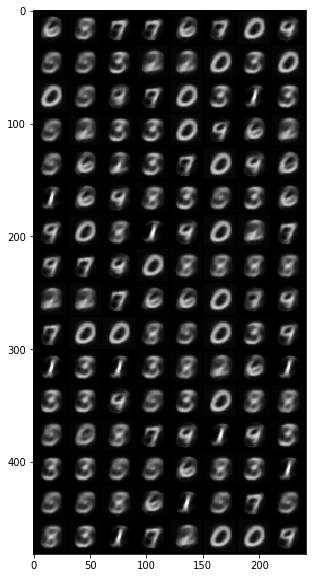

In [114]:
probs, batch_hat = caps_model(batch_var)
plot_batch(batch_hat.data)

[1] https://arxiv.org/abs/1710.09829